In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
data = pd.read_csv('./melting_tank.csv')

In [5]:
_temp = data['MELT_TEMP']
_speed = data['MOTORSPEED']

In [6]:
data

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [5]:
ts = data[['MELT_TEMP','MOTORSPEED','TAG']].groupby(['MELT_TEMP','MOTORSPEED','TAG']).size().sort_values(ascending=False).reset_index(name='count')

In [6]:
dt = defaultdict(int)
for i in range(len(ts)):
    key = str(ts.iloc[i].values[0])+','+str(ts.iloc[i].values[1])+','+ts.iloc[i].values[2]
    dt[key] = ts.iloc[i].values[3]
dt

defaultdict(int,
            {'437,0,OK': 376,
             '442,0,OK': 372,
             '438,0,OK': 365,
             '441,0,OK': 359,
             '436,0,OK': 358,
             '448,0,OK': 357,
             '435,0,OK': 348,
             '440,0,OK': 347,
             '446,0,OK': 347,
             '433,0,OK': 346,
             '444,0,OK': 345,
             '443,0,OK': 344,
             '434,0,OK': 343,
             '445,0,OK': 333,
             '449,0,OK': 324,
             '443,0,NG': 324,
             '447,0,OK': 322,
             '450,0,OK': 321,
             '430,0,OK': 320,
             '431,0,OK': 318,
             '442,0,NG': 318,
             '452,0,OK': 318,
             '441,0,NG': 315,
             '438,0,NG': 310,
             '439,0,OK': 308,
             '451,0,OK': 308,
             '444,0,NG': 308,
             '445,0,NG': 301,
             '436,0,NG': 299,
             '429,0,OK': 299,
             '432,0,OK': 299,
             '448,0,NG': 298,
             '456,0,OK'

In [7]:
key_arr = list(map(lambda x: x.split(','),dt.keys()))

In [8]:
tempA, speedA, tagA = np.split(np.array(key_arr),3,axis=1)
labelA = np.array(list(dt.values()))

In [9]:
len(tagA)

55917

In [10]:
ok_list = np.where(tagA=='OK')[0]
ng_list = np.where(tagA=='NG')[0]

In [11]:
type(ok_list)

numpy.ndarray

In [12]:
temp_ok = np.array(tempA[ok_list],dtype=np.float64)/10
temp_ng = np.array(tempA[ng_list],dtype=np.float64)/10
speed_ok = np.array(speedA[ok_list],dtype=np.float64)/10
speed_ng = np.array(speedA[ng_list],dtype=np.float64)/10

In [13]:
frq_ok = labelA[ok_list]
frq_ng = labelA[ng_list]

In [14]:
temp_ok_in_ng=np.where(temp_ok<max(temp_ng))[0]
speed_ok_in_ng=np.where(speed_ok<max(speed_ng))[0]

In [15]:
temp_on = temp_ok[temp_ok_in_ng]
speed_on = speed_ok[temp_ok_in_ng]
frq_on = frq_ok[temp_ok_in_ng]

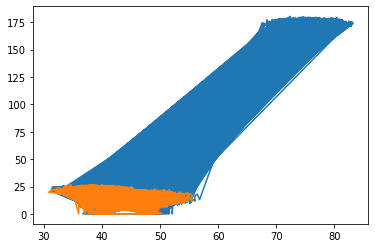

In [16]:
fig,axis = plt.subplots()
axis.plot(temp_ok,speed_ok)
axis.plot(temp_ng,speed_ng)

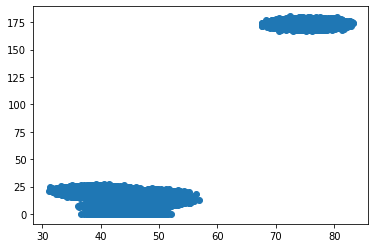

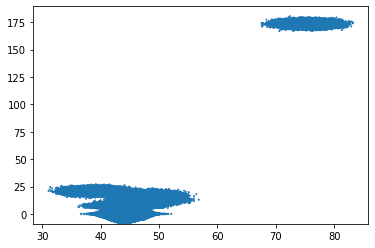

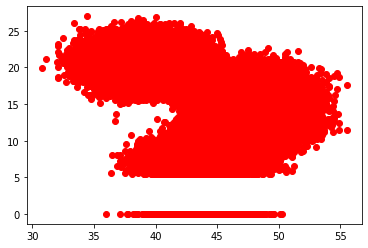

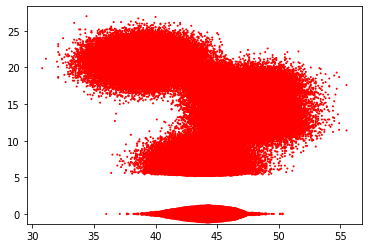

In [17]:
fig,axis2 = plt.subplots()
axis2.scatter(temp_ok,speed_ok)
plt.show()

fig,axis2 = plt.subplots()
axis2.scatter(temp_ok,speed_ok,s=frq_ok)
plt.show()

fig,axis2 = plt.subplots()
axis2.scatter(temp_ng,speed_ng,c='red')
plt.show()


fig,axis2 = plt.subplots()
axis2.scatter(temp_ng,speed_ng,s=frq_ng,c='red')
plt.show()

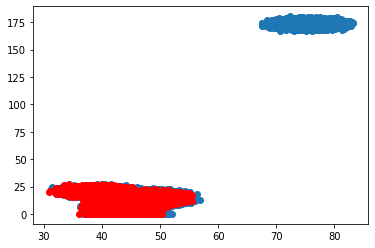

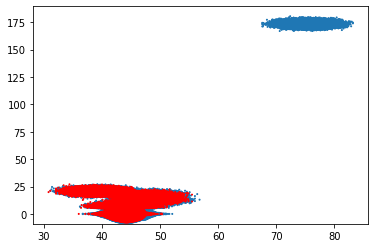

In [18]:
fig,axis2 = plt.subplots()
axis2.scatter(temp_ok,speed_ok)
axis2.scatter(temp_ng,speed_ng,c='red')
plt.show()


fig,axis2 = plt.subplots()
axis2.scatter(temp_ok,speed_ok,s=frq_ok)
axis2.scatter(temp_ng,speed_ng,s=frq_ng,c='red')
plt.show()

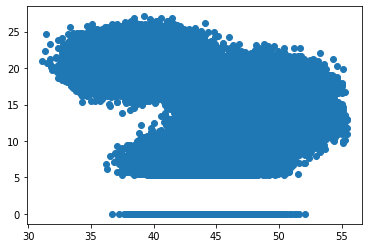

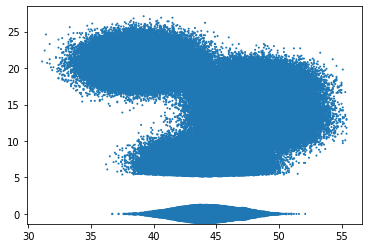

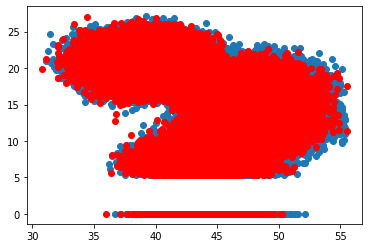

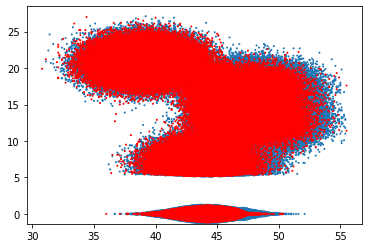

In [19]:
fig,axis2 = plt.subplots()
axis2.scatter(temp_on,speed_on)
#axis2.scatter(temp_ng,speed_ng,c='red')
plt.show()


fig,axis2 = plt.subplots()
axis2.scatter(temp_on,speed_on,s=frq_on)
#axis2.scatter(temp_ng,speed_ng,s=frq_ng,c='red')
plt.show()

fig,axis2 = plt.subplots()
axis2.scatter(temp_on,speed_on)
axis2.scatter(temp_ng,speed_ng,c='red')
plt.show()


fig,axis2 = plt.subplots()
axis2.scatter(temp_on,speed_on,s=frq_on)
axis2.scatter(temp_ng,speed_ng,s=frq_ng,c='red')
plt.show()

In [22]:
print(np.sum(frq_ok[temp_ok_in_ng]))
print(np.sum(frq_ng))

491083
177067


In [23]:

import pickle
with open('./data.pkl','wb') as f:
    pickle.dump((tempA,speedA,tagA,labelA),f)
